In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [2]:
data = pd.read_csv('/Users/huynhthao/Downloads/data_ml.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4956 non-null   object 
 1   VND=X   4949 non-null   float64
dtypes: float64(1), object(1)
memory usage: 77.6+ KB


In [3]:
data.head()

,Date,VND=X
0,01/01/2004,NaN
1,01/02/2004,15147.0
2,01/05/2004,15148.0
3,01/06/2004,15150.0
4,01/07/2004,15153.0


In [4]:
data.dropna(inplace= True)
# Calculate IQR and filter outliers
Q1 = data['VND=X'].quantile(0.25)
Q3 = data['VND=X'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['VND=X'] >= lower_bound) & (data['VND=X'] <= upper_bound)]
data.reset_index()

,index,Date,VND=X
0,1,01/02/2004,15147.0
1,2,01/05/2004,15148.0
2,3,01/06/2004,15150.0
3,4,01/07/2004,15153.0
4,5,01/08/2004,15129.0
...,...,...,...
4937,4951,12/26/2022,23560.0
4938,4952,12/27/2022,23590.0
4939,4953,12/28/2022,23580.0
4940,4954,12/29/2022,23620.0


In [5]:
petallength = data['Date']
petalwidth = data['VND=X']

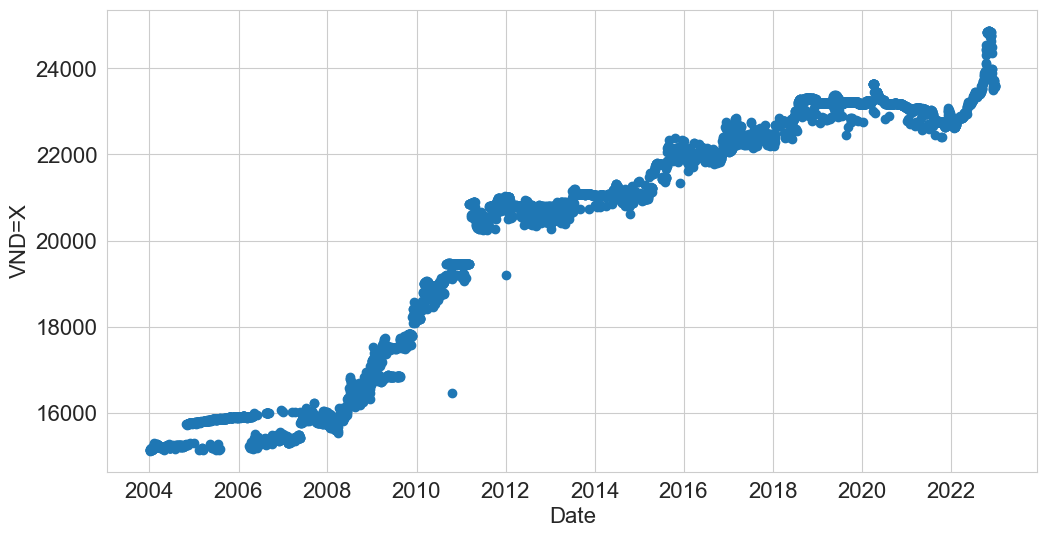

In [7]:
# Chuyển đổi cột "Date" sang định dạng ngày tháng năm
data['Date'] = pd.to_datetime(data['Date'])
# Sắp xếp dữ liệu theo cột "Date"
data = data.sort_values(by='Date')
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['VND=X'])
plt.xlabel('Date')
plt.ylabel('VND=X')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(petalwidth, petallength, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
data['VND=X'] = pd.to_numeric(data['VND=X'], errors='coerce')
data.dropna(subset=['VND=X'], inplace=True)

In [12]:
def create_lagged_features(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)
    return df
lag = 10  # Number of lagged features
df_lagged = create_lagged_features(data['VND=X'], lag)
X = df_lagged.iloc[:, :-1].values
y = df_lagged.iloc[:, -1].values
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

RMSE is 428.22306898737816 for k_value: 1
RMSE is 365.60733336550896 for k_value: 2
RMSE is 346.9712619323925 for k_value: 3
RMSE is 335.361082817182 for k_value: 4
RMSE is 329.1042426990456 for k_value: 5
RMSE is 326.3798558438332 for k_value: 6
RMSE is 324.0457915893733 for k_value: 7
RMSE is 322.6018026532507 for k_value: 8
RMSE is 321.7913331756719 for k_value: 9
RMSE is 334.4817163209215 for k_value: 10
RMSE is 332.80890815061827 for k_value: 11
RMSE is 331.5062382337769 for k_value: 12
RMSE is 330.6667958070917 for k_value: 13
RMSE is 329.7066768765381 for k_value: 14
RMSE is 328.67083248824355 for k_value: 15
RMSE is 328.24297524614923 for k_value: 16
RMSE is 327.8094372601177 for k_value: 17
RMSE is 327.1664851826467 for k_value: 18
RMSE is 327.4402330905958 for k_value: 19
RMSE is 327.3900480594035 for k_value: 20
RMSE is 328.54434376436245 for k_value: 21
RMSE is 328.34609519372634 for k_value: 22
RMSE is 328.0438663697271 for k_value: 23
RMSE is 327.93537265660143 for k_valu

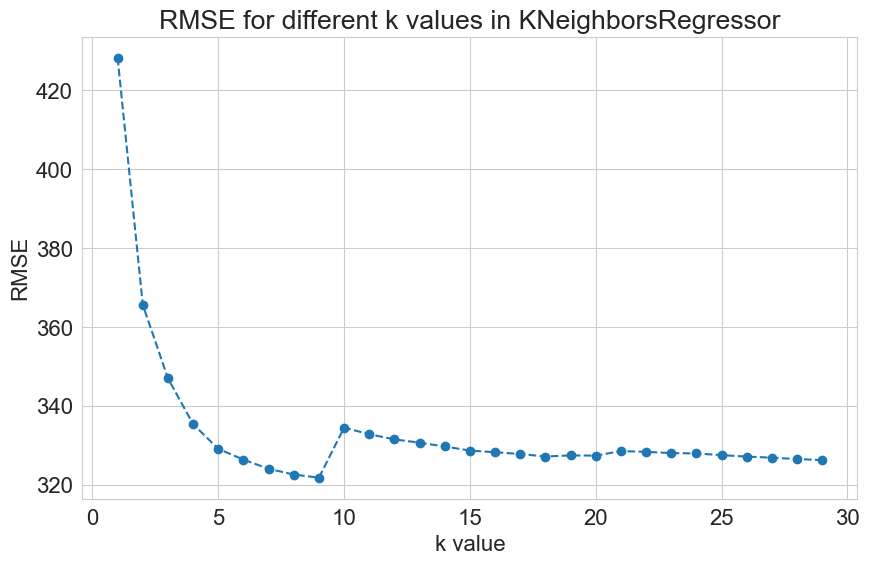

In [13]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ensure 'VND=X' column is numeric
data['VND=X'] = pd.to_numeric(data['VND=X'], errors='coerce')
data.dropna(subset=['VND=X'], inplace=True)

# Scale the data if necessary (optional)
# scaler = MinMaxScaler(feature_range=(0, 1))
# data['VND=X'] = scaler.fit_transform(data['VND=X'].values.reshape(-1, 1))

# Prepare the dataset
def create_lagged_features(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)
    return df

lag = 10  # Number of lagged features
df_lagged = create_lagged_features(data['VND=X'], lag)
X = df_lagged.iloc[:, :-1].values
y = df_lagged.iloc[:, -1].values

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Calculate RMSE for different k values
rmse_val = []
for K_value in range(1, 30):
    neigh = KNeighborsRegressor(n_neighbors=K_value)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print(f'RMSE is {error} for k_value: {K_value}')

# Plot RMSE values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), rmse_val, marker='o', linestyle='--')
plt.title('RMSE for different k values in KNeighborsRegressor')
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


RMSE cho giá trị k=10: 334.4817163209215


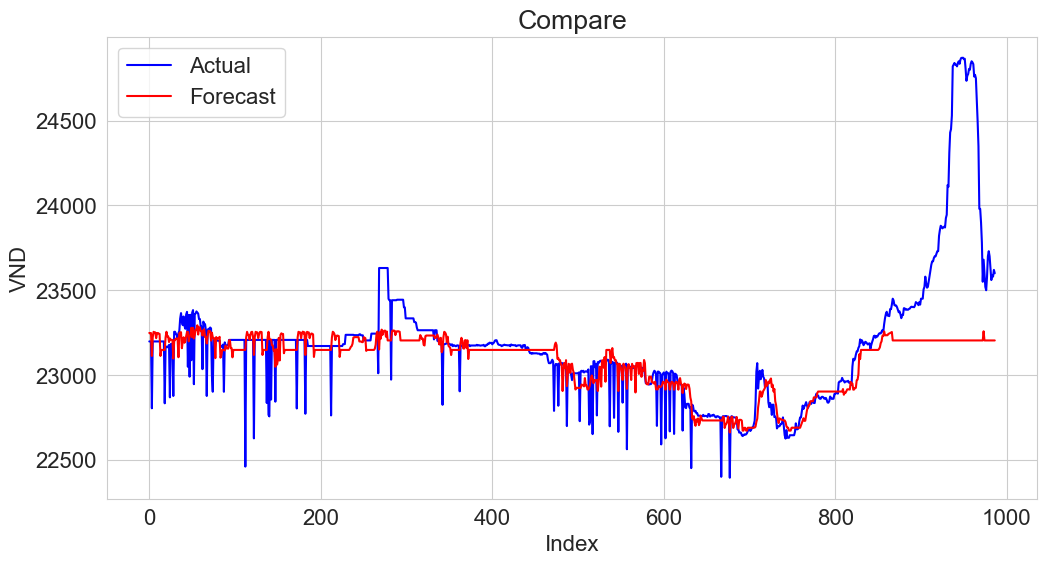

In [14]:
# Chọn giá trị k tối ưu từ biểu đồ (ví dụ k=9)
optimal_k = 10

# Xây dựng mô hình KNeighborsRegressor với giá trị k tối ưu
neigh = KNeighborsRegressor(n_neighbors=optimal_k)
neigh.fit(X_train, y_train)

# Dự đoán trên tập dữ liệu kiểm tra
pred = neigh.predict(X_test)

# Tính toán RMSE trên tập dữ liệu kiểm tra
error = np.sqrt(mean_squared_error(y_test, pred))
print(f'RMSE cho giá trị k={optimal_k}: {error}')

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(pred)), pred, label='Forecast', color='red')
plt.title('Compare')
plt.xlabel('Index')
plt.ylabel('VND')
plt.legend()
plt.grid(True)
plt.show()
